In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load the RNA and ATAC files
df_rna = pd.read_csv('Hackathon2024.RNA.txt', delimiter='\t')
df_atac = pd.read_csv('Hackathon2024.ATAC.txt', delimiter='\t')

# Inspect the data
df_rna.head()

,gene,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCCCAGTAGGAT.1,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1
0,MIR1302-2HG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FAM138A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OR4F5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL627309.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AL627309.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_atac.head()

,peak,AAACCAACACAATGCC.1,AAACCAACAGGAACTG.1,AAACCAACATAATCCG.1,AAACCAACATTGTGCA.1,AAACCGCGTACTTCAC.1,AAACCGGCATAATCAC.1,AAACGCGCAGCAAGAT.1,AAACGGATCCCATAGG.1,AAAGCAAGTGCTAGCG.1,...,TTTGTCCCAGTAGGAT.1,TTTGTCTAGCTATTAG.1,TTTGTCTAGGACCTGC.1,TTTGTGAAGCGATACT.1,TTTGTGAAGGAACGGT.1,TTTGTGGCAGCAACCT.1,TTTGTGTTCATTGACA.1,TTTGTGTTCGTCAAGT.1,TTTGTGTTCTCCATAT.1,TTTGTTGGTCAGGAAG.1
0,chr1-10109-10357,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,chr1-180730-181630,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,chr1-191491-191736,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1-267816-268196,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1-586028-586373,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Load & inspect metadata
metadata_file = 'Hackathon2024.Meta.txt'
df_metadata = pd.read_csv(metadata_file, delimiter='\t')
df_metadata.head()

,nCount_RNA,nCount_ATAC,CellType
AAACCAACACAATGCC-1,5849,16550,CD14 Mono
AAACCAACAGGAACTG-1,5901,25593,CD14 Mono
AAACCAACATAATCCG-1,7975,42743,CD14 Mono
AAACCAACATTGTGCA-1,5525,21760,CD14 Mono
AAACCGCGTACTTCAC-1,10327,76652,CD14 Mono


In [5]:
df_training = pd.read_csv('Hackathon2024.Training.Set.Peak2Gene.Pairs.txt', delimiter='\t')
df_training.head()

,peak,gene,Pair,Peak2Gene
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,True
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,True
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,True
3,chr1-212604203-212626574,ATF3,chr1-212604203-212626574_ATF3,True
4,chr2-96541661-96555628,ARID5A,chr2-96541661-96555628_ARID5A,True


In [6]:
# Convert boolean values to integers (True -> 1, False -> 0)
df_training['Peak2Gene'] = df_training['Peak2Gene'].astype(int)

In [7]:
# Convert all columns to numeric, forcing errors to NaN (if any non-numeric data exists)
df_rna_numeric = df_rna.apply(pd.to_numeric, errors='coerce')
df_atac_numeric = df_atac.apply(pd.to_numeric, errors='coerce')

# Calculate the mean RNA counts across all cells for each gene
mean_rna_counts = df_rna_numeric.mean(axis=1)  # Average across all cells (columns)
mean_rna_counts.name = 'mean_rna_counts'
mean_rna_df = pd.DataFrame({'gene': df_rna.iloc[:, 0], 'mean_rna_counts': mean_rna_counts})

# Drop rows where the mean RNA count is 0
mean_rna_df = mean_rna_df[mean_rna_df['mean_rna_counts'] > 0]
mean_rna_df.head()

,gene,mean_rna_counts
3,AL627309.1,0.021340
5,AL627309.2,0.000333
6,AL627309.5,0.137713
7,AL627309.4,0.011337
8,AP006222.2,0.000333


In [8]:
# Calculate the mean ATAC counts across all cells for each peak
mean_atac_counts = df_atac_numeric.mean(axis=1)  # Average across all cells (columns)
mean_atac_counts.name = 'mean_atac_counts'
mean_atac_df = pd.DataFrame({'peak': df_atac.iloc[:, 0], 'mean_atac_counts': mean_atac_counts})

# Drop rows where the mean RNA count is 0
mean_atac_df = mean_atac_df[mean_atac_df['mean_atac_counts'] > 0]

mean_atac_df.head()

,peak,mean_atac_counts
0,chr1-10109-10357,0.009003
1,chr1-180730-181630,0.026009
2,chr1-191491-191736,0.014005
3,chr1-267816-268196,0.037679
4,chr1-586028-586373,0.022674


In [9]:
# Merge mean RNA counts with training data based on 'gene'
df_training = df_training.merge(mean_rna_df, on='gene', how='left')

# Merge mean ATAC counts with training data based on 'peak'
df_training = df_training.merge(mean_atac_df, on='peak', how='left')

df_training.head()

,peak,gene,Pair,Peak2Gene,mean_rna_counts,mean_atac_counts
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,1,2.103701,0.380127
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,1,1.340447,0.691230
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,1,0.675559,0.662888
3,chr1-212604203-212626574,ATF3,chr1-212604203-212626574_ATF3,1,1.250417,6.757586
4,chr2-96541661-96555628,ARID5A,chr2-96541661-96555628_ARID5A,1,0.273758,1.234078


In [10]:
# Ensure the gene column is set as the index for df_rna
df_rna.set_index(df_rna.columns[0], inplace=True)

# Ensure the peak column is set as the index for df_atac
df_atac.set_index(df_atac.columns[0], inplace=True)

# Initialize an empty list to store correlations
correlations = []

# Function to compute robust correlation
def compute_correlation(rna_values, atac_values):
    
    # Replace zeros with a small positive value to mitigate zero inflation
    epsilon = 1e-10
    rna_values = rna_values.replace(0, epsilon)
    atac_values = atac_values.replace(0, epsilon)
    
    # Compute the correlation
    correlation = rna_values.corr(atac_values)
    return correlation

# Iterate through each pair in the training data
for _, row in df_training.iterrows():
    gene = row['gene']
    peak = row['peak']
    
    # Extract RNA and ATAC counts for this gene and peak
    rna_values = df_rna.loc[gene]
    atac_values = df_atac.loc[peak]
    
    # Compute the correlation
    correlation = compute_correlation(rna_values, atac_values)
    correlations.append(correlation)

# Add correlations to the training dataframe
df_training['rna_atac_correlation'] = correlations
df_training.head()

,peak,gene,Pair,Peak2Gene,mean_rna_counts,mean_atac_counts,rna_atac_correlation
0,chr1-89196985-89201657,GBP2,chr1-89196985-89201657_GBP2,1,2.103701,0.380127,0.083005
1,chr6-33077557-33083333,HLA-DPA1,chr6-33077557-33083333_HLA-DPA1,1,1.340447,0.691230,0.102732
2,chr6-137789753-137792920,TNFAIP3,chr6-137789753-137792920_TNFAIP3,1,0.675559,0.662888,0.118542
3,chr1-212604203-212626574,ATF3,chr1-212604203-212626574_ATF3,1,1.250417,6.757586,0.254281
4,chr2-96541661-96555628,ARID5A,chr2-96541661-96555628_ARID5A,1,0.273758,1.234078,0.085944


In [11]:
# Load testing data
df_testing = pd.read_csv('Hackathon2024.Testing.Set.Peak2Gene.Pairs.txt', delimiter='\t')
df_testing.head()

,peak,gene,Pair,Peak2Gene
0,chr1-1245493-1248050,SDF4,chr1-1245493-1248050_SDF4,?
1,chr1-1330394-1334148,MRPL20,chr1-1330394-1334148_MRPL20,?
2,chr1-2145904-2147150,FAAP20,chr1-2145904-2147150_FAAP20,?
3,chr1-9713011-9736481,PIK3CD,chr1-9713011-9736481_PIK3CD,?
4,chr1-21287896-21301043,ECE1,chr1-21287896-21301043_ECE1,?


In [12]:
# Initialize lists to store the features
mean_rna_test = []
mean_atac_test = []
correlations_test = []

# Iterate through each pair in the test data
for _, row in df_testing.iterrows():
    gene = row['gene']
    peak = row['peak']
    
    # Compute the mean RNA counts for the gene
    mean_rna = df_rna.loc[gene].mean()
    mean_rna_test.append(mean_rna)
    
    # Compute the mean ATAC counts for the peak
    mean_atac = df_atac.loc[peak].mean()
    mean_atac_test.append(mean_atac)
    
    # Compute the correlation between RNA and ATAC counts
    correlation = df_rna.loc[gene].corr(df_atac.loc[peak])
    correlations_test.append(correlation)

# Add the computed features to the test dataframe
df_testing['mean_rna_counts'] = mean_rna_test
df_testing['mean_atac_counts'] = mean_atac_test
df_testing['rna_atac_correlation'] = correlations_test
df_testing.head()

,peak,gene,Pair,Peak2Gene,mean_rna_counts,mean_atac_counts,rna_atac_correlation
0,chr1-1245493-1248050,SDF4,chr1-1245493-1248050_SDF4,?,0.150383,0.112371,0.002070
1,chr1-1330394-1334148,MRPL20,chr1-1330394-1334148_MRPL20,?,0.288096,0.180393,0.006696
2,chr1-2145904-2147150,FAAP20,chr1-2145904-2147150_FAAP20,?,0.127376,0.124708,-0.007857
3,chr1-9713011-9736481,PIK3CD,chr1-9713011-9736481_PIK3CD,?,1.222407,2.206069,0.146060
4,chr1-21287896-21301043,ECE1,chr1-21287896-21301043_ECE1,?,0.310103,2.377459,0.110263


In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df_training[['mean_rna_counts', 'mean_atac_counts', 'rna_atac_correlation']]  # Features
y = df_training['Peak2Gene']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [14]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9833
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [15]:
# Prepare the test data
X_test_data = df_testing[['mean_rna_counts', 'mean_atac_counts', 'rna_atac_correlation']]

# Predict Peak2Gene for the test data
df_testing['Peak2Gene'] = model.predict(X_test_data)

df_testing.head()

,peak,gene,Pair,Peak2Gene,mean_rna_counts,mean_atac_counts,rna_atac_correlation
0,chr1-1245493-1248050,SDF4,chr1-1245493-1248050_SDF4,0,0.150383,0.112371,0.002070
1,chr1-1330394-1334148,MRPL20,chr1-1330394-1334148_MRPL20,0,0.288096,0.180393,0.006696
2,chr1-2145904-2147150,FAAP20,chr1-2145904-2147150_FAAP20,0,0.127376,0.124708,-0.007857
3,chr1-9713011-9736481,PIK3CD,chr1-9713011-9736481_PIK3CD,1,1.222407,2.206069,0.146060
4,chr1-21287896-21301043,ECE1,chr1-21287896-21301043_ECE1,1,0.310103,2.377459,0.110263


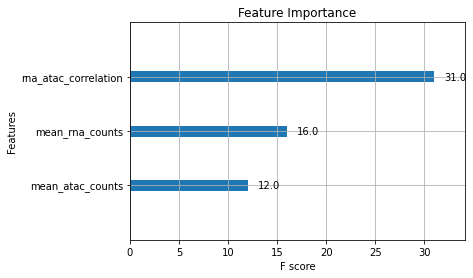

In [16]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(model)
plt.title('Feature Importance')
plt.show()

/var/folders/vy/0z8v3jyd1s5dtympqrbppvrh0000gn/T/ipykernel_51138/1251444940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_training['Peak2Gene'],


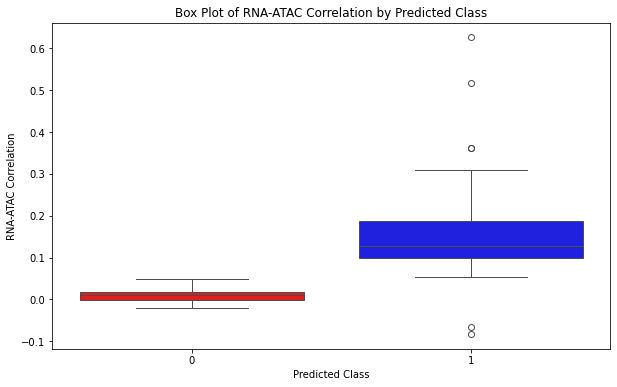

In [17]:
#Box Plot of Training Set
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_training['Peak2Gene'], 
            y=df_training['rna_atac_correlation'], 
            palette=['red', 'blue'])
plt.title('Box Plot of RNA-ATAC Correlation by Predicted Class')
plt.xlabel('Predicted Class')
plt.ylabel('RNA-ATAC Correlation')
plt.show()

/var/folders/vy/0z8v3jyd1s5dtympqrbppvrh0000gn/T/ipykernel_51138/81534075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_testing['Peak2Gene'],


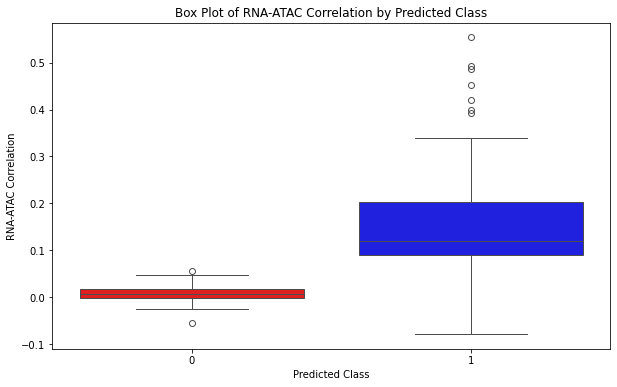

In [18]:
#Box Plot of Testing Set
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_testing['Peak2Gene'], 
            y=df_testing['rna_atac_correlation'], 
            palette=['red', 'blue'])
plt.title('Box Plot of RNA-ATAC Correlation by Predicted Class')
plt.xlabel('Predicted Class')
plt.ylabel('RNA-ATAC Correlation')
plt.show()

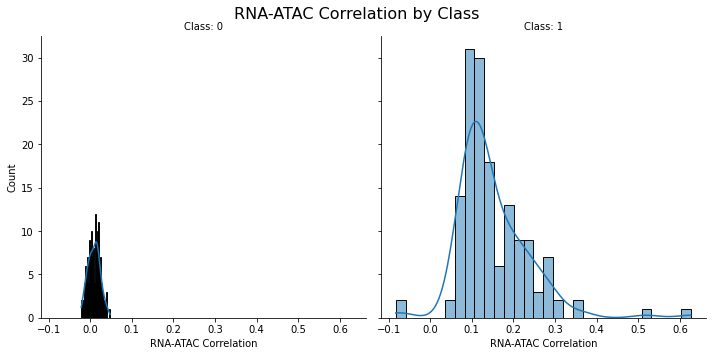

In [19]:
# Create a FacetGrid to plot separate histograms for each class
g = sns.FacetGrid(df_training, col='Peak2Gene', col_wrap=2, height=5, palette=['red', 'blue'])

# Map the histogram plot to each facet
g.map(sns.histplot, 'rna_atac_correlation', kde=True, bins=30)

# Add titles and labels
g.set_axis_labels('RNA-ATAC Correlation', 'Count')
g.set_titles(col_template='Class: {col_name}')
g.fig.suptitle('RNA-ATAC Correlation by Class', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

plt.show()

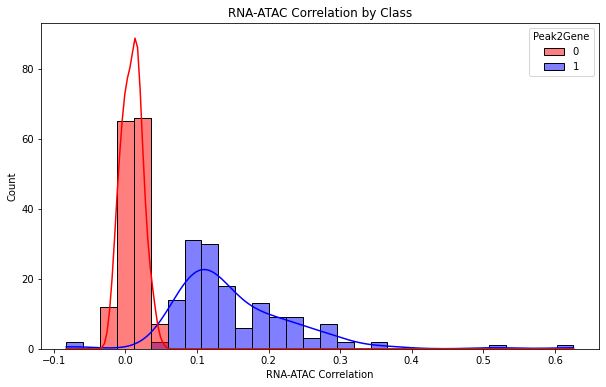

In [20]:
#Histogram of each class in Training Set
plt.figure(figsize=(10, 6))
sns.histplot(data=df_training, x='rna_atac_correlation', hue='Peak2Gene', kde=True, palette=['red', 'blue'], bins=30)
plt.title('RNA-ATAC Correlation by Class')
plt.xlabel('RNA-ATAC Correlation')
plt.ylabel('Count')
plt.show()

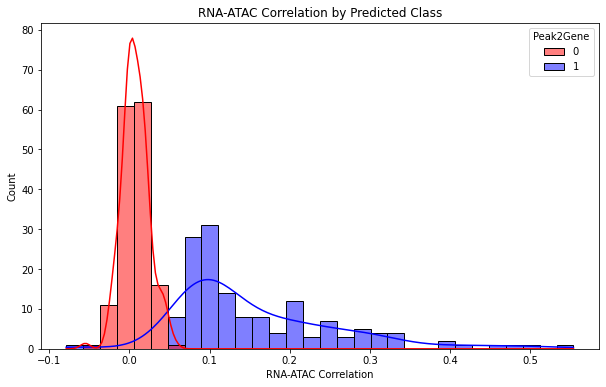

In [21]:
#Histogram of each class in Testing Set
plt.figure(figsize=(10, 6))
sns.histplot(data=df_testing, x='rna_atac_correlation', hue='Peak2Gene', kde=True, palette=['red', 'blue'], bins=30)
plt.title('RNA-ATAC Correlation by Predicted Class')
plt.xlabel('RNA-ATAC Correlation')
plt.ylabel('Count')
plt.show()

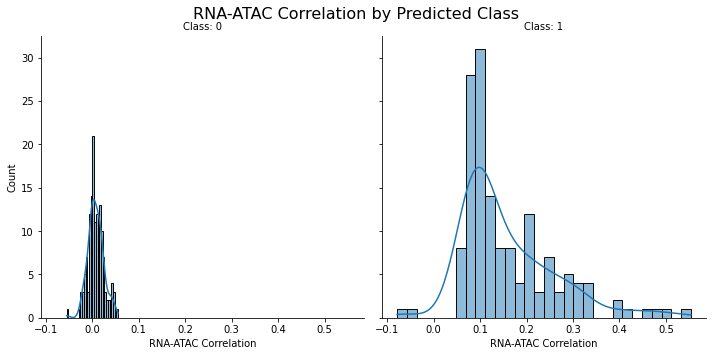

In [22]:
# Create a FacetGrid to plot separate histograms for each class
g = sns.FacetGrid(df_testing, col='Peak2Gene', col_wrap=2, height=5, palette=['red', 'blue'])

# Map the histogram plot to each facet
g.map(sns.histplot, 'rna_atac_correlation', kde=True, bins=30)

# Add titles and labels
g.set_axis_labels('RNA-ATAC Correlation', 'Count')
g.set_titles(col_template='Class: {col_name}')
g.fig.suptitle('RNA-ATAC Correlation by Predicted Class', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

plt.show()

In [23]:
# Drop the columns not needed for the final output
df_testing = df_testing.drop('mean_rna_counts', axis=1)
df_testing = df_testing.drop('mean_atac_counts', axis=1)
df_testing = df_testing.drop('rna_atac_correlation', axis=1)
df_testing['Peak2Gene'] = df_testing['Peak2Gene'].astype(bool)

# Save the DataFrame to a CSV file
df_testing.to_csv('prediction.csv', index=False)